# Business Understanding

## Project Domain

Domain: Agroteknologi & Quality Control
Sub-Domain: Otomatisasi Penilaian Kualitas Produk Pertanian

Proyek ini berada di persimpangan antara teknologi pertanian (agrotech) dan pengendalian kualitas (quality control). Tujuannya adalah mengembangkan sistem berbasis machine learning untuk membantu industri perkayuan, rempah-rempah, dan UMKM dalam mengevaluasi kualitas produk secara otomatis dan akurat, khususnya produk kayu manis.

## Problem Statements

1.Subjektivitas Penilaian Kualitas.
Penilaian kualitas kayu manis masih mengandalkan pengamatan manual oleh manusia yang rentan terhadap bias dan inkonsistensi.</br>
2.Lambat dan Tidak Efisien.
Proses penyortiran manual membutuhkan waktu lama dan sumber daya manusia yang terlatih.</br>
3.Kurangnya Sistem Otomatisasi.
Tidak banyak tersedia sistem yang memanfaatkan data sensor atau fitur visual/fisik untuk klasifikasi kualitas kayu manis secara real-time.</br>
4.Kerugian Ekonomi.
Salah klasifikasi produk berkualitas rendah sebagai produk premium dapat merugikan pelanggan, sedangkan salah klasifikasi produk bagus sebagai kualitas rendah akan merugikan produsen.

## Goals


1.Mengembangkan model klasifikasi kualitas kayu manis menggunakan Artificial Neural Network (ANN).</br>
2.Mengolah fitur-fitur seperti kelembaban, berat, panjang, warna, dan tekstur sebagai input untuk menentukan kualitas secara otomatis.</br>
3.Mencapai akurasi tinggi dan stabil dalam membedakan kualitas tinggi dan rendah dari sampel kayu manis.</br>
4.Menyediakan sistem yang dapat digunakan oleh pelaku usaha, peneliti, maupun pemerintah untuk mendukung standarisasi mutu produk.

## Solution Statements

1.Model Machine Learning Berbasis ANN. Membangun dan melatih model ANN untuk mengklasifikasikan kualitas berdasarkan fitur-fitur numerik (contohnya: moisture, weight, size, color).</br>
2.Sistem Preprocessing Otomatis. Menyertakan tahap normalisasi data dan encoding label untuk memastikan input kompatibel dengan model AI.</br>
3.Prediksi Real-Time & Akurat. Model dapat memberikan prediksi kualitas dalam waktu kurang dari 1 detik per sampel, ideal untuk diintegrasikan ke sistem sortir otomatis.</br>
4.Sistem yang Scalable dan Efisien. Solusi ini dapat diperluas ke komoditas pertanian lainnya, menjadikannya fondasi untuk sistem inspeksi kualitas produk berbasis AI di sektor pangan.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadadnanall","key":"196b7ce6e8e61eca73cc4c602eda6a04"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d madaraweerasingha/cinnamon-quality-classification

Dataset URL: https://www.kaggle.com/datasets/madaraweerasingha/cinnamon-quality-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.17k [00:00<?, ?B/s]
100% 1.17k/1.17k [00:00<00:00, 3.59MB/s]


In [4]:
!unzip cinnamon-quality-classification.zip

Archive:  cinnamon-quality-classification.zip
  inflating: balanced_cinnamon_quality_dataset.csv  


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('balanced_cinnamon_quality_dataset.csv')

In [7]:
df.head()

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               60 non-null     object 
 1   Moisture (%)            60 non-null     float64
 2   Ash (%)                 60 non-null     float64
 3   Volatile_Oil (%)        60 non-null     float64
 4   Acid_Insoluble_Ash (%)  60 non-null     float64
 5   Chromium (mg/kg)        60 non-null     float64
 6   Coumarin (mg/kg)        60 non-null     float64
 7   Quality_Label           60 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.9+ KB


In [9]:
df.describe()

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,11.883500,6.514500,1.050833,0.450500,0.002188,0.008837
std,1.171428,0.637124,0.272585,0.161816,0.000739,0.004963
min,10.030000,5.530000,0.610000,0.200000,0.001000,0.002100
25%,11.047500,5.967500,0.777500,0.347500,0.001600,0.004400
50%,11.635000,6.395000,1.090000,0.430000,0.002050,0.008450
75%,12.657500,7.160000,1.260000,0.557500,0.002625,0.012275
max,13.930000,7.490000,1.490000,0.790000,0.003900,0.019400


In [10]:
df.isnull().sum()

,0
Sample_ID,0
Moisture (%),0
Ash (%),0
Volatile_Oil (%),0
Acid_Insoluble_Ash (%),0
Chromium (mg/kg),0
Coumarin (mg/kg),0
Quality_Label,0


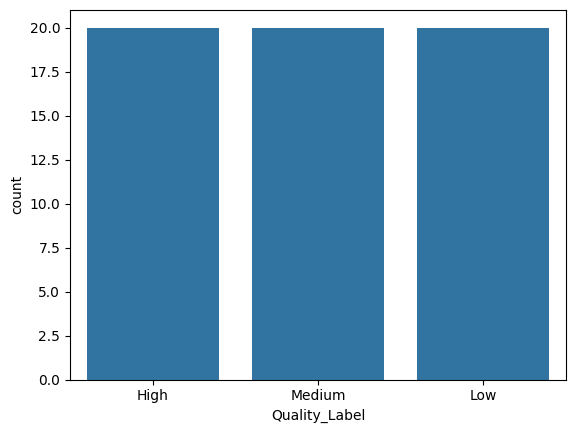

In [11]:
sns.countplot(x='Quality_Label', data=df)
plt.show()

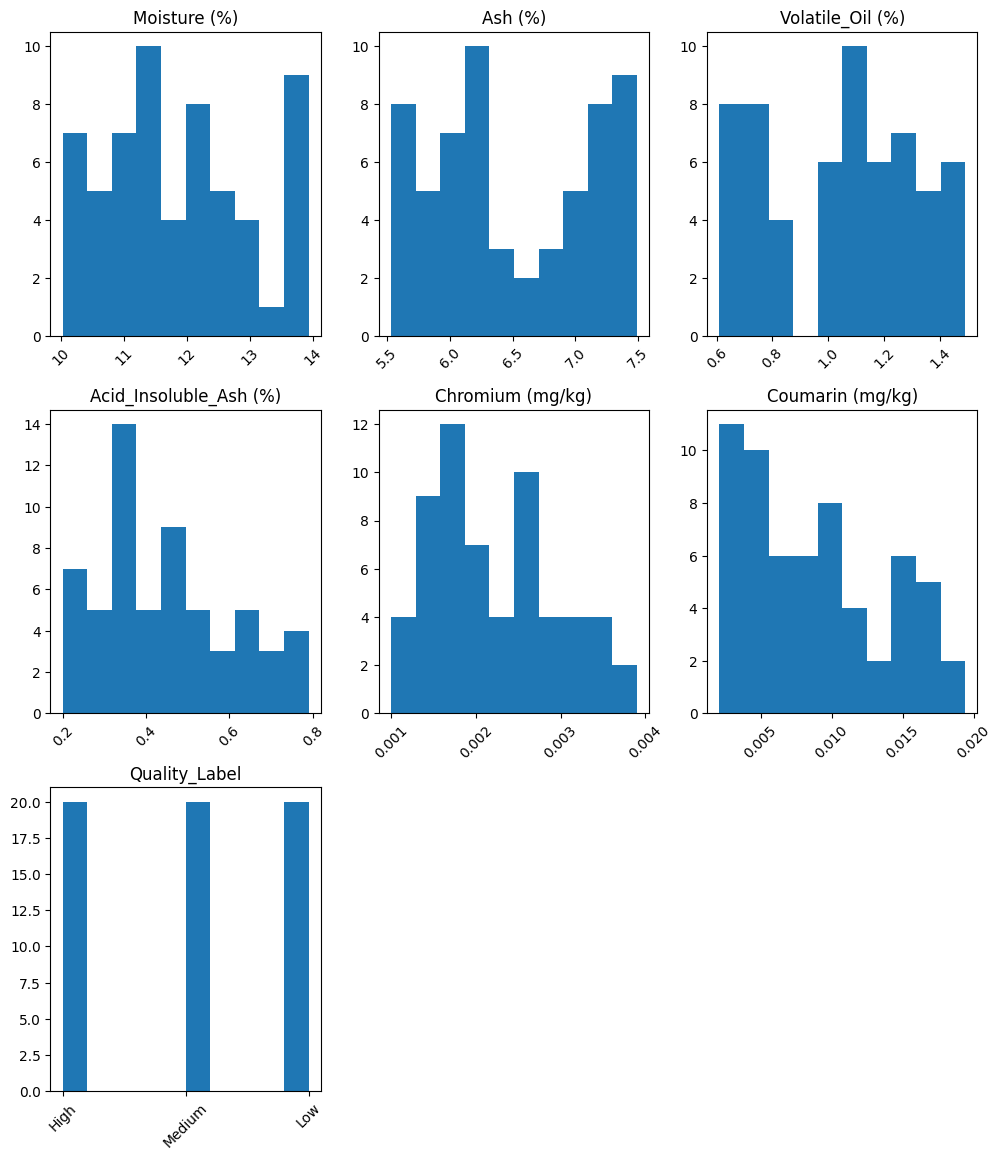

In [12]:
cols = list(df.columns)
cols_df=cols[1:]
plt.figure(figsize=(10,30))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols_df[i]])

plt.tight_layout()

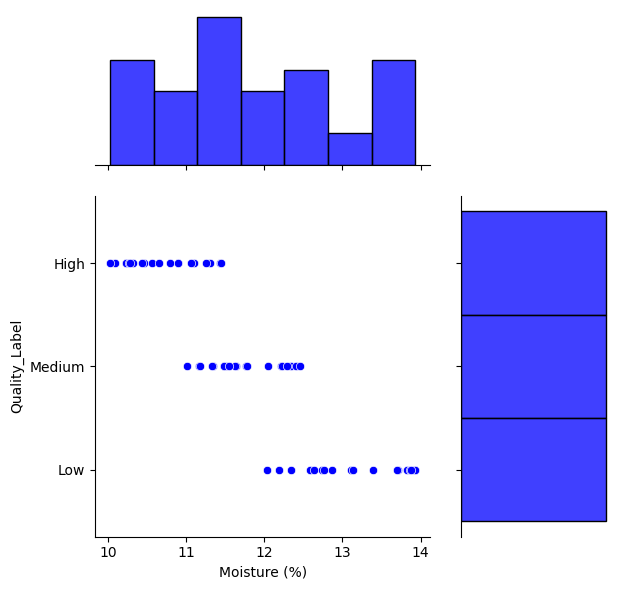

In [13]:
sns.jointplot(x="Moisture (%)", y="Quality_Label",  data=df, height=6, ratio=2, color="blue")

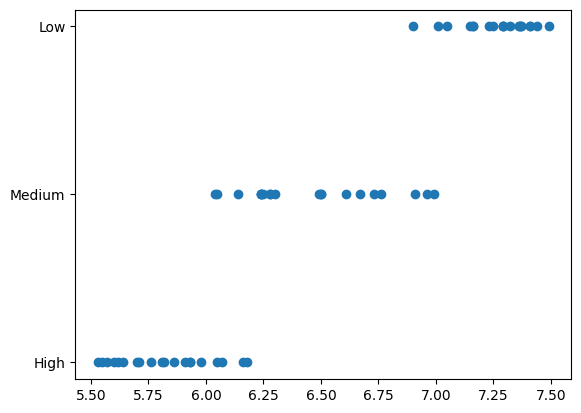

In [14]:
plt.scatter(df["Ash (%)"], df["Quality_Label"])

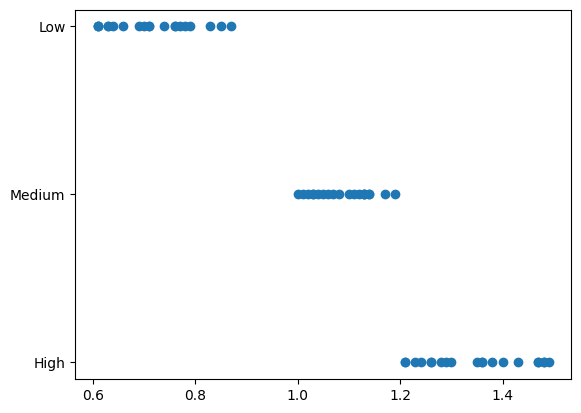

In [15]:
plt.scatter(df["Volatile_Oil (%)"], df["Quality_Label"])

# Data Preparation

In [16]:
X = df.drop(columns=['Sample_ID','Quality_Label'])
y = df['Quality_Label']

In [17]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=0)

# Modeling

In [20]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [21]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,331 (44.26 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

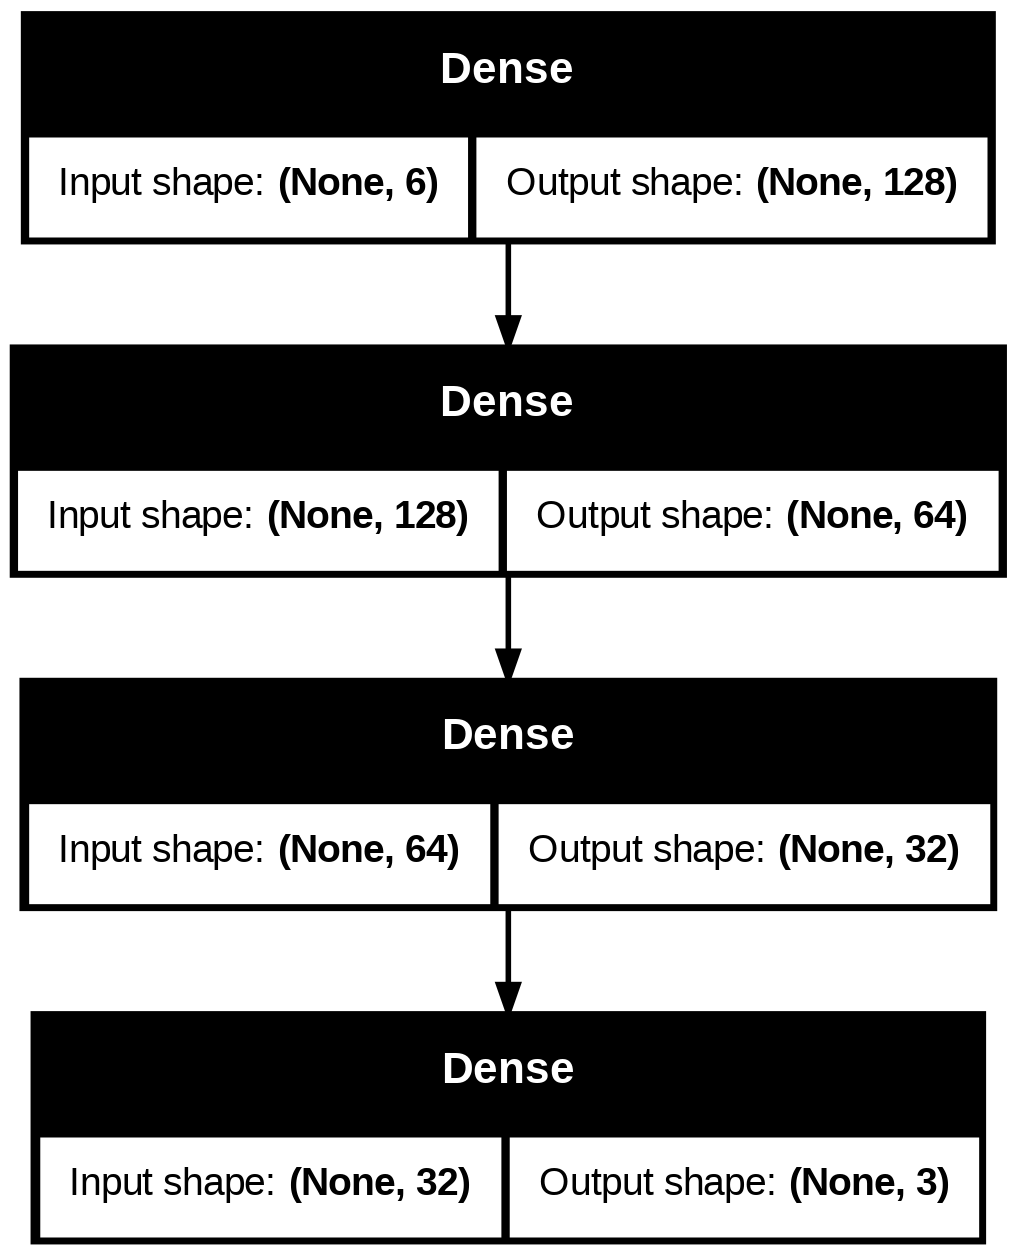

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [24]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.0755 - loss: 1.1177 - val_accuracy: 0.2500 - val_loss: 1.0936
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3880 - loss: 1.0785 - val_accuracy: 0.2500 - val_loss: 1.0704
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4635 - loss: 1.0471 - val_accuracy: 0.4167 - val_loss: 1.0493
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4766 - loss: 1.0206 - val_accuracy: 0.5833 - val_loss: 1.0299
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7031 - loss: 0.9878 - val_accuracy: 0.5833 - val_loss: 1.0076
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6953 - loss: 0.9612 - val_accuracy: 0.5833 - val_loss: 0.9817
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6562 - loss: 0.9529 - val_accuracy: 0.5833 - val_loss: 0.9538
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6562 - loss: 0.8967 - val_accuracy: 0.5833 - val_loss: 0.9212

# Evaluation

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0166
Akurasi Model: 1.0000
Loss Model: 0.0166


In [26]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

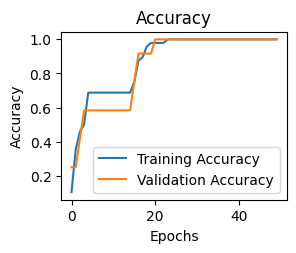

In [27]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

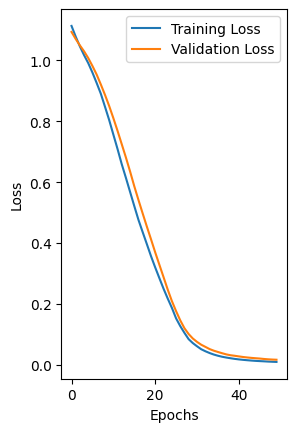

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


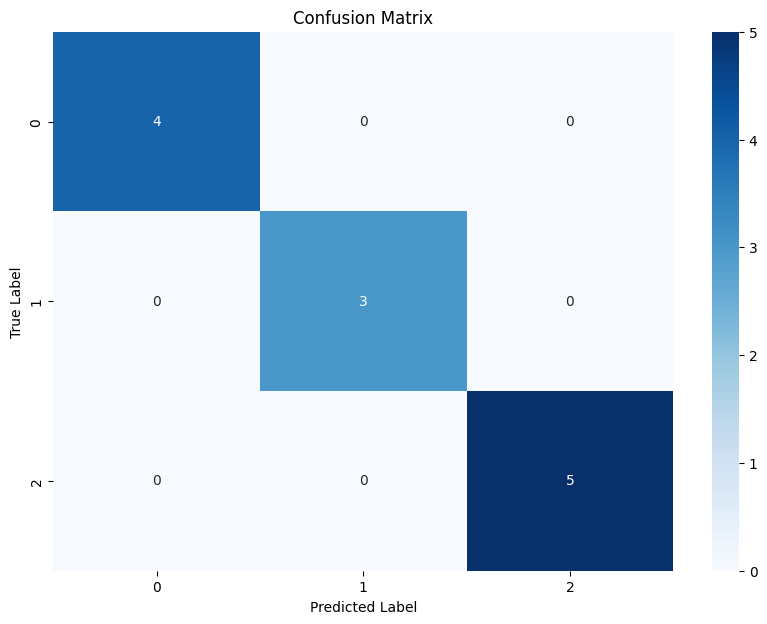

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# **Deployment**

# Model Simulation

In [30]:
sample_input = np.array([[11.17, 6.3, 1.11, 0.48, 0.0028, 0.0076]])  # contoh 6 nilai fitur
sample_input_df = pd.DataFrame(sample_input, columns=X.columns)

In [31]:
sample_input_scaled = scaler.transform(sample_input_df)

In [32]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Prediksi Kualitas Kayu Manis: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediksi Kualitas Kayu Manis: Medium


# Save Model

In [33]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpigj6mrh9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133077068672528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068671184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068674640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068675600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068671760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068675792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068672144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133077068673488: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [34]:
# Simpan model
with open('cinnamon_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [35]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']